# Comparação entre as fronteiras de Bayes e Análise Discriminante Linear

## Introdução

A Análise Discriminante Linear ou em inglês _Linear Discriminant Analysis_ (LDA) é um modelo estatístico criado para tentar a aproximar o algoritmo de Bayes. Em termos matemáticos, isto significa que o LDA estima a seguinte probabilidade:

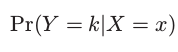

Onde:

X: Vetor aleatório das variáveis independentes. <br> 
x: Ponto de consulta de X,i.e, os valores das variáveis. <br>
Y: Variável dependente (Nossa classe ou target, aquilo que desejamos estimar). <br>
k: Uma possível classe. 

Tal probabilidade é estimada indiretamente pelo LDA pela seguinte equação:

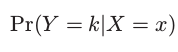

Onde:

pik : Probabilidade a priori da classe K (ou distribuição). <br>
fk(x): Função densidade de probabilidade de x.

Como tal probabilidade é uma estimativa da verdadeira (lembre-se que é impossível na vida real calcular a distribuição condicional de Y dado X), erros podem ocorrer devido as fronteiras de separação que cada algoritmo cria. 

Para mais informações veja o capítulo 4 do livro: _https://www.ime.unicamp.br/~dias/Intoduction%20to%20Statistical%20Learning.pdf_

## Objetivos

Neste pequeno notebook criamos uma função chamada __graph__ que é responsável por gerar duas distribuições normais (logo, temos duas classes) e plotá-las no gráfico. Após esssa etapa, as duas fronteiras de cada modelo são mostrados assim como o ponto de consulta. Tal ponto é unidimensional, assim p = 1, ou seja, temos apenas um atributo em nosso vetor aleatório X.

Desse modo, o objetivo deste notebook é entender melhor (visualmente) como que funciona tal fronteira de decisão permitindo ao leitor passar diversos pontos de consulta para a função na finalidade de ver sua classificação.

In [1]:
#Import's
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.axes

Abaixo temos a construção da função que gera o gráfico assim como funções auxiliares

In [2]:
#Calculo da gaussiana
def gaussian(x,mean,sigma):
    return (1/np.sqrt(2*np.pi*np.power(sigma,2))) * np.exp(-np.power(x-mean,2)/(2*np.power(sigma,2)))

#Probabilidade de cada classe para um ponto de consulta
def probClass(x,ua,ub,sigma,pa,pb):
    p1 = gaussian(x,ua,sigma) * pa
    p2 = gaussian(x,ub,sigma) * pb
    return [np.round(p1/(p1+p2),2),1-np.round(p1/(p1+p2),2)]

#Calula a fronteira de decisao de bayes
def bayes_boundary(ua,ub):
    return (ua+ub)/2

#Calula a fronteira de decisao da analise discriminante
def lda_boundary(u1,u2,sigma,pi1,pi2):
    return ((u1+u2)/2) + ((np.power(sigma,2) * np.log(pi2/pi1)) / (u1-u2))

#Plot das distribuições em conjunto com as fronteiras e um ponto de consulta
def graph(x,ua,ub,sigma,pa,pb):
    #Gerando distribuições normais
    a = np.random.normal(loc=ua,scale=sigma,size=500)
    b = np.random.normal(loc=ub,scale=sigma,size=500)
    
    #Plot das distribuições
    plt.figure(figsize=(10,8))
    sns.distplot(a,hist=False,color='blue',label='Classe A')
    sns.distplot(b,hist=False,color='orange',label='Classe B')
    
    #Frontreira de decisão de bayes
    plt.axvline(x=bayes_boundary(ua,ub),color='black',linestyle='--',label='Bayes')

    #Fronteira de decisao do LDA
    plt.axvline(x=lda_boundary(ua,ub,sigma,pa,pb),color='black',label='LDA')
    
    #Probabilidades do ponto de consulta pertencer a classe a(1) ou b(2)
    p1,p2 = probClass(x,ua,ub,sigma,pa,pb)
    font = {'family': 'serif','weight': 'normal','size': 16,}
    plt.text(x=-20,y=0.06,s='P(A): ' + str(p1),fontdict=font,color='blue')
    plt.text(x=-20,y=0.057,s='P(B): ' + str(p2),fontdict=font,color='orange')
    
    #Verificação da classe do ponto de consulta e plotagem
    if(p1 > p2):
        plt.scatter(x=x,y=0.001,color='blue',label='Query',s=100)
    else:
        plt.scatter(x=x,y=0.001,color='orange',label='Query',s=100)
    
    plt.legend(loc='upper right')
    plt.title('Análise do ponto de consulta',fontsize=16)
    plt.show()

Parâmetros para as duas distribuições normais

In [3]:
#Média
ua = 10
ub = 0

#Desvio padrão
sigma = 6

#Probabilidade a priori de cada distribuição (classe)
pa = 0.8
pb = 0.2

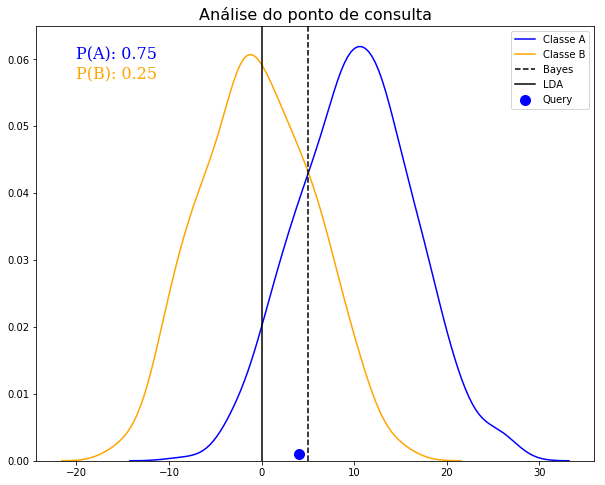

In [4]:
#Chamada da função com o ponto de consulta x = 4
graph(4,ua,ub,sigma,pa,pb)